In [265]:
from nanugpt import utils


In [266]:
#log_filepath = r"$OUT_DIR/grokking/seed_search_v2_baseline.txt"
#log_filepath = r"$OUT_DIR/grokking/seed_search_20230904115534.log"
log_filepath = r"$OUT_DIR/grokking/seed_search_20230915054609.log"
#log_filepath = r"D:\Dropbox\out_dir\grokking\magic8_seed_search.txt"
#log_filepath = r"D:\Dropbox\out_dir\grokking\seed_search_wd0_magic8.txt"




In [267]:
with open(utils.full_path(log_filepath), 'r') as f:
    lines = f.readlines()

logs = []
for line in lines:
    if 'val/acc=' not in line:
        continue
    columns = line.split('[INFO] ')[1].split(',')
    log = {}
    for column in columns:
        if '=' in column:
            key, val = tuple(column.split('='))
            val = val.strip()
            if val.isnumeric():
                val = int(val)
            else:
                try:
                    val = float(val)
                except ValueError:
                    pass
            log[key.strip()] = val
    logs.append(log)
    
print('Number of logs: {}'.format(len(logs)))
print('Example log: {}'.format(logs[0]))

Number of logs: 120
Example log: {'train/step': 2999, 'train/loss': 0.06947, 'train/ppl': 1.072, 'train/acc': 0.988, 'val/loss': 9.413, 'val/ppl': 12250.0, 'val/acc': 0.02545, 'w_norm': 65.27, 'lr': 0.001}


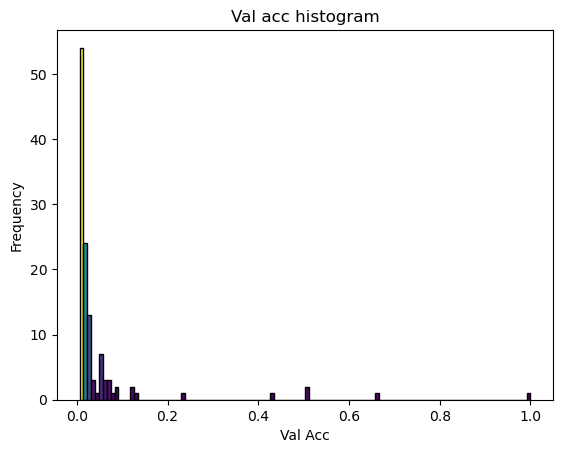

In [268]:
utils.draw_histogram([log['val/acc'] for log in logs if log['val/acc'] > 0], 'Val Acc', 'Frequency', 'Val acc histogram')

In [269]:
good_seeds = [log for log in logs if log['val/acc'] > 0.98]
print('Number of good seeds: {}'.format(len(good_seeds)))
print('% of good seeds: {}%'.format(len(good_seeds) * 100.0 / len(logs)))

Number of good seeds: 1
% of good seeds: 0.8333333333333334%


In [270]:
normal_seeds = [log for log in logs if log['val/acc'] < 0.25]
print('Number of normal seeds: {}'.format(len(normal_seeds)))
print('% of normal_seeds seeds: {}%'.format(len(normal_seeds) * 100.0 / len(logs)))

Number of normal seeds: 115
% of normal_seeds seeds: 95.83333333333333%


In [271]:
import numpy as np
import torch

def get_stats(nums):
    if isinstance(nums, torch.Tensor):
        nums = nums.detach().cpu().numpy()
    if isinstance(nums, list):
        nums = np.array(nums)
    nums = np.array(nums)
    return {'mean': np.mean(nums),
            'median': np.median(nums),
            'std': np.std(nums),
            'min': np.min(nums),
            'max': np.max(nums),
            'n': len(nums)}


print('Training stats:')
print(get_stats([log['train/acc'] for log in logs]))

print('Validation stats:')
print(get_stats([log['val/acc'] for log in logs]))

Training stats:
{'mean': 0.9837675, 'median': 0.9856, 'std': 0.009241646340524693, 'min': 0.9524, 'max': 1.0, 'n': 120}
Validation stats:
{'mean': 0.051335849999999995, 'median': 0.016120000000000002, 'std': 0.12983308312455458, 'min': 0.006019, 'max': 1.0, 'n': 120}


In [272]:
train_stats, val_stats = [], []
for i in range(2, len(logs)):
    ts = get_stats([log['train/acc'] for log in logs[:i]])
    vs = get_stats([log['val/acc'] for log in logs[:i]])
    train_stats.append(ts)
    val_stats.append(vs)

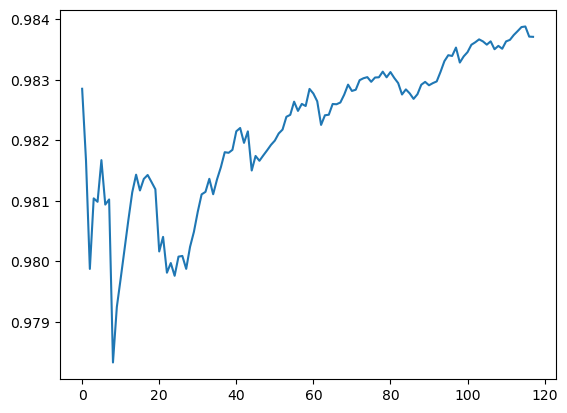

In [273]:
import matplotlib.pyplot as plt
plt.plot([ts['mean'] for ts in train_stats], label='train')

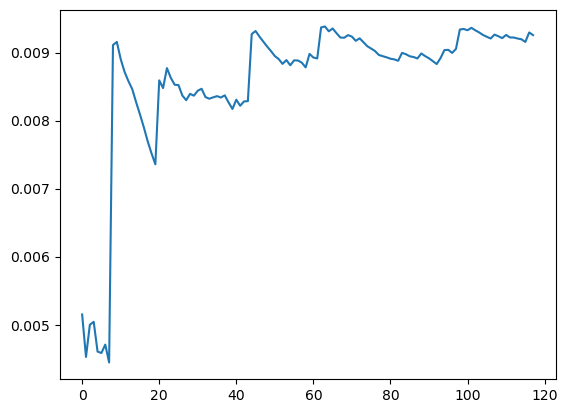

In [274]:
import matplotlib.pyplot as plt
plt.plot([ts['std'] for ts in train_stats], label='train')

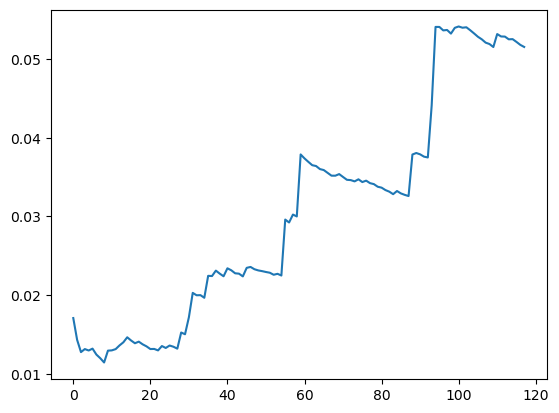

In [275]:
import matplotlib.pyplot as plt
plt.plot([ts['mean'] for ts in val_stats], label='val')

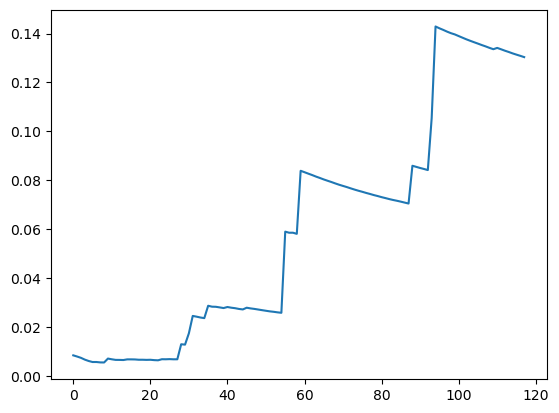

Bad pipe message: %s [b'\xd5\x0b\x83\x9b\x17N\xdc\x7f\xa48M\x8cuG\xa0\xe3\xf5\\ \xdb\xd7\xf9\xb6\xf8\xb0g\rXx\xe2\xc2\xc4\xef\x03l\xd4\x8fU\xd7\xc5m\xf7Z\xd1\xc6\x17!)+\xb4\xef\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff', b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\xfe\xda\x80KVsNU\nH\x06{\xbcj\x0f\xdd \x83\xd3\xa2\xdeN\xd9\xe1\xc2F\xcb\x18\x82dDq5|\xc9\x1d\xd5b84\xb2\xc4K,\x91\x86]\xc6\t\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00', b'\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"Is!$w\xb2.\xe8#5\xca\xf9\xc0\x01T5\xd0\xdb\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc

In [276]:
import matplotlib.pyplot as plt
plt.plot([ts['std'] for ts in val_stats], label='train')